# Figures
1. Network diagram
2. Wythoff game play demo (in python?) 
    - a. moves
    - b. H/C spots
3. Example of strategist learning (Alp-ish)
4. Optimal score main effect (2 panels).
     - a. stumbler and strategist
     - b. strategist and perfect strategist    
5. Control exp for heuristics and param sensitivity (optimal score)
     - a. H,C,and HC 
     - b. TODO: add noise to hyper; noise_fn needed
6. Optimal score during transfer to larger board (1 panel), 50 -> 500. 
     - a. stumbler and strategist  
7. Total reward during transfer to new rules (2 panels). Nim and Euclid.
    - a. Naive nim and Nim w/ bias_board
    - b. Naive euclid and Euclid w/ bias_board

In [27]:
import os
import csv
import numpy as np
import scipy.stats as st
import pandas as pd

from glob import glob

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from notebook_helpers import load_monitored
from notebook_helpers import load_evaluated
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

import seaborn as sns
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 14})
matplotlib.rc('axes', titlesize=16)

# Load data 

- All figures

In [9]:
path = "/Users/type/Code/azad/data/wythoff/exp13/"
results_path = "/Users/type/Code/azad/data/wythoff/"

files = sorted(glob(os.path.join(path, "run_*_monitor.csv")))
files[:10]

exp_13 = []
for fi in files:
    mon = load_monitored(fi)
    exp_13.append(mon)

path = "/Users/type/Code/azad/data/wythoff/exp14/"

exp_14 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_14.append(mon)

path = "/Users/type/Code/azad/data/wythoff/exp15/"

exp_15 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_15.append(mon)

path = "/Users/type/Code/azad/data/wythoff/exp16/"

exp_16 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_16.append(mon)

path = "/Users/type/Code/azad/data/wythoff/exp17/"

exp_17 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_17.append(mon)

path = "/Users/type/Code/azad/data/wythoff/exp18/"

exp_18 = []
runs = range(1, 21)
for r in runs:
    files = sorted(glob(os.path.join(path, 
        "run_{}_episode*_stumbler*.csv".format(int(r)))))
    
    mon = join_monitored(files, sort_key='episode')
    exp_18.append(mon)

In [10]:
episode_13, exp_13_avg, exp_13_sem = score_summary(exp_13)
episode_14, exp_14_avg, exp_14_sem = score_summary(exp_14)
episode_15, exp_15_avg, exp_15_sem = score_summary(exp_15)
episode_16, exp_16_avg, exp_16_sem = score_summary(exp_16)
episode_18, exp_18_avg, exp_18_sem = score_summary(exp_18)

In [11]:
def load_stumbler_data(path, index_range=(0, 20)):
    exps = []
    runs = range(index_range[0], index_range[1])
    for r in runs:
        files = sorted(glob(os.path.join(path, 
            "run_{}_episode*_stumbler*".format(int(r)))))

        mon = join_monitored(files, sort_key='episode')
        exps.append(mon)
    return exps

path = "/Users/type/Code/azad/data/wythoff/exp30/"
exp_30 = load_stumbler_data(path)
grid_30 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp31/"
exp_31 = load_stumbler_data(path)
grid_31 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp32/"
exp_32 = load_stumbler_data(path)
grid_32 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp33"
exp_33 = load_stumbler_data(path, (0, 10))
grid_33 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp34/"
exp_34 = load_stumbler_data(path, (0, 10))
grid_34 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

path = "/Users/type/Code/azad/data/wythoff/exp35/"
exp_35 = load_stumbler_data(path)
grid_35 = np.loadtxt(os.path.join(path, "grid.csv"), skiprows=1, delimiter=",")

In [12]:
# Join the data into a three col table: (run_code, param, max(score[-1:-100])
# Add default data (exp_14)
exps = [exp_14, exp_35, exp_30, exp_31, exp_32, exp_33, exp_34]
params = [
    "Baseline",
    "Epsilon",
    "Influence learning rate", 
    "Stumbler learning rate", 
    "Strategist learning rate", 
    "Hot threshold",
    "Cold threshold",
]

exp_30_35 = {
    "run_code" : [], 
    "param" : [], 
    "max_score" : [], 
    "mean_score" : [], 
    "median_score" : []}
for param, exp in zip(params, exps):
    for run_code, mon in enumerate(exp):
        exp_30_35["run_code"].append(run_code)
        exp_30_35["max_score"].append(np.max(mon["score"][-100:-1]))
        exp_30_35["mean_score"].append(np.mean(mon["score"]))
        exp_30_35["median_score"].append(np.median(mon["score"]))
        exp_30_35["param"].append(param)
        
exp_30_35 = pd.DataFrame(exp_30_35)
exp_30_35.head()

,max_score,mean_score,median_score,param,run_code
0,0.863015,0.812589,0.846872,Baseline,0
1,0.871301,0.825212,0.857563,Baseline,1
2,0.836599,0.790218,0.818950,Baseline,2
3,0.766403,0.697258,0.735031,Baseline,3
4,0.730890,0.685279,0.712667,Baseline,4


In [21]:
exp_24_games = [
    ("Wythoff15x15", 15),
    ("Wythoff50x50", 50),
    ("Wythoff100x100", 100),
    ("Wythoff150x150", 150),
    ("Wythoff200x200", 200),
    ("Wythoff250x250", 250),
    ("Wythoff300x300", 300),
    ("Wythoff350x350", 350),
    ("Wythoff400x400", 400),
    ("Wythoff450x450", 450),
    ("Wythoff500x500", 500)
]

# GREEDY
path = "/Users/type/Code/azad/data/wythoff/exp24a/"
exp_24_a = {}
for game in exp_24_games:
    files = glob(os.path.join(path, "run_*_{}.csv".format(game[0])))
    value = load_evaluated(files, game[1])
    exp_24_a[game] = value
    
# RANDOM
path = "/Users/type/Code/azad/data/wythoff/exp24b/"
exp_24_b = {}
for game in exp_24_games:
    files = glob(os.path.join(path, "run_*_{}.csv".format(game[0])))
    value = load_evaluated(files, game[1])
    exp_24_b[game] = value

# Figures

## Fig 1.

Load image

## Fig 2.

Make moves on a board

Make HC board

## Fig 3. 

Strategist learning demo

## Fig 4. 

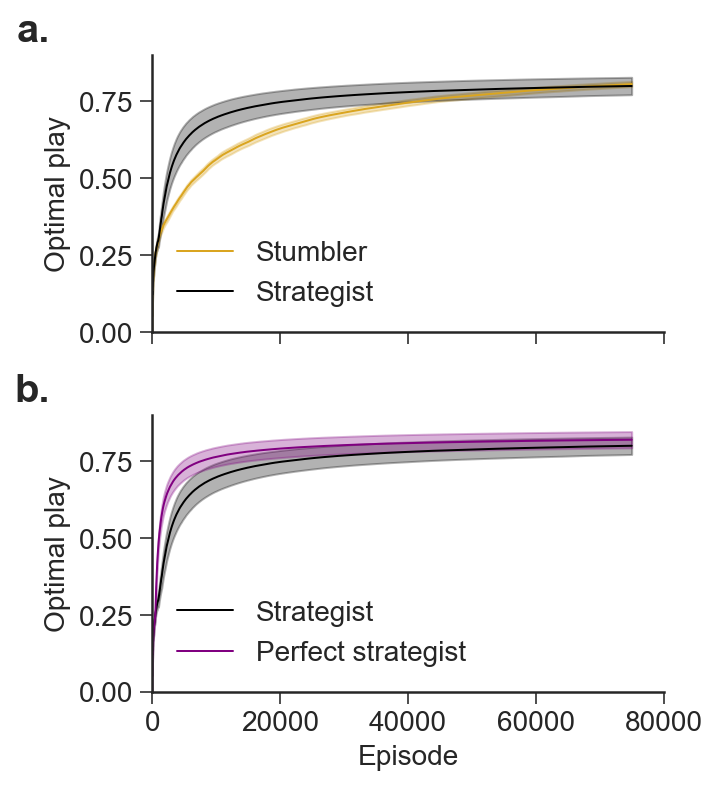

In [29]:
# plt.figure()
fig, ax = plt.subplots(2, sharex=True, figsize=(5, 5.5))

# A
_ = ax[0].plot(episode_13, exp_13_avg, linestyle="-", color='goldenrod', alpha=1.0, linewidth=1, label="Stumbler")
_ = ax[0].fill_between(episode_13, 
                       exp_13_avg + 2*exp_13_sem, 
                       exp_13_avg - 2*exp_13_sem,
                       color='goldenrod', alpha=0.3)

_ = ax[0].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Strategist")
_ = ax[0].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[0].legend()
_ = ax[0].set_ylabel("Optimal play")
_ = ax[0].set_ylim(0, 0.9)
_ = ax[1].set_xlim(0, 80000)
_ = ax[0].text(-0.2, 1.15, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# B
_ = ax[1].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="Strategist")
_ = ax[1].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[1].plot(episode_18, exp_18_avg, color='purple', alpha=1, linewidth=1, label="Perfect strategist")
_ = ax[1].fill_between(episode_18, 
                       exp_18_avg + 2*exp_18_sem, 
                       exp_18_avg - 2*exp_18_sem,
                       color='purple', alpha=0.3)
_ = ax[1].legend()
_ = ax[1].set_xlabel("Episode")
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].set_ylim(0, 0.9)
_ = ax[1].set_xlim(0, 80000)
_ = ax[1].text(-0.2, 1.15, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# Tweaks
_ = fig.tight_layout()
_ = sns.despine()
_ = fig.subplots_adjust(hspace=.3)

## Fig 5.

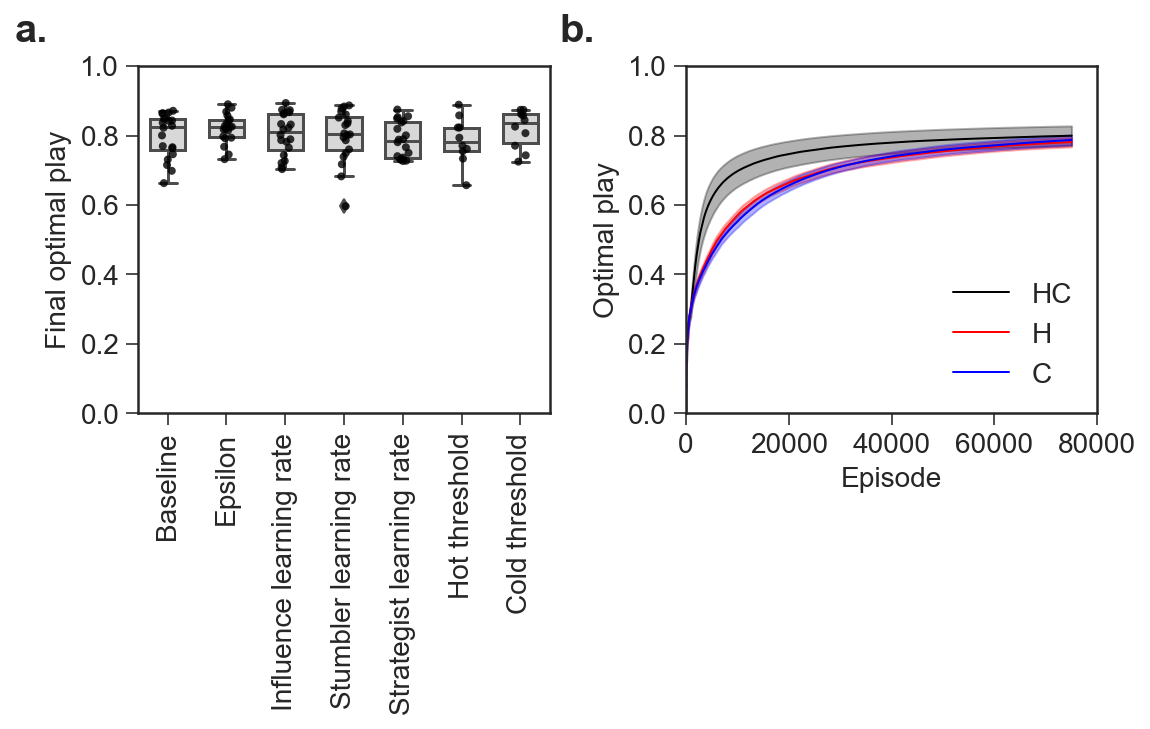

In [98]:
# Param sensitivity
fig, ax = plt.subplots(1, 2, figsize=(8, 5))
_ = sns.boxplot(x="param", y="max_score", data=exp_30_35, 
                color="grey", width=0.6, ax=ax[0])
for patch in ax[0].artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
# _ = sns.violinplot(x="param", y="max_score", data=exp_30_35, 
#                 color="lightgrey", width=0.8, ax=ax[0])
_ = sns.stripplot(x="param", y="max_score", data=exp_30_35, 
                  color="black", alpha=0.8, size=4, jitter=True, ax=ax[0])

_ = ax[0].set_ylim(0, 1)
_ = ax[0].set_xlabel("")
_ = ax[0].set_ylabel("Final optimal play")
_ = ax[0].set_xticklabels(ax1.get_xticklabels(), rotation=90)
_ = ax[0].text(-0.22, 1.15, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# H / C 
_ = ax[1].plot(episode_14, exp_14_avg, color='black', alpha=1, linewidth=1, label="HC")
_ = ax[1].fill_between(episode_14, 
                       exp_14_avg + 2*exp_14_sem, 
                       exp_14_avg - 2*exp_14_sem,
                       color='black', alpha=0.3)
_ = ax[1].plot(episode_15, exp_15_avg, color='red', alpha=1, linewidth=1, label="H")
_ = ax[1].fill_between(episode_15, 
                       exp_15_avg + 2*exp_15_sem, 
                       exp_15_avg - 2*exp_15_sem,
                       color='red', alpha=0.3)
_ = ax[1].plot(episode_16, exp_16_avg, color='blue', alpha=1, linewidth=1, label="C")
_ = ax[1].fill_between(episode_16, 
                       exp_16_avg + 2*exp_16_sem, 
                       exp_16_avg - 2*exp_16_sem,
                       color='blue', alpha=0.3)

_ = ax[1].legend()
_ = ax[1].set_ylim(0, 1)
_ = ax[1].set_xlim(0, 80000)
_ = ax[1].set_xlabel("Episode")
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].text(-0.22, 1.15, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# Tweaks
_ = fig.tight_layout()
_ = fig.subplots_adjust(hspace=0.75)

## Fig 6.

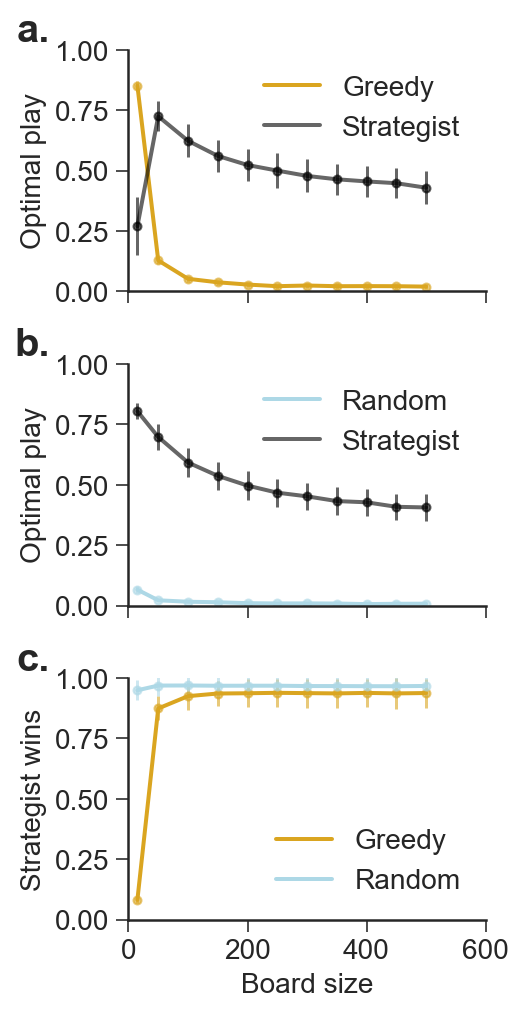

In [78]:
# fig, ax = plt.subplots(2, sharex=True, figsize=(4.5, 5.75))
fig, ax = plt.subplots(3, sharex=True, figsize=(4*0.8, 10*0.8))

# --------------------------------------------------------------
# SCORES

# GREEDY:
# Stumbler
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_a.items()):
    g.append(game[1])
    m.append(np.mean(v["stumbler_score"]))
    s.append(2*st.sem(v["stumbler_score"]))
_ = ax[0].errorbar(x=g, y=m, yerr=s, fmt='o', color='goldenrod', alpha=0.6, markersize=4)
_ = ax[0].plot(g, m, linestyle="-", linewidth=2, color='goldenrod',  alpha=1.0, label="Greedy")

# Strategist
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_a.items()):
    g.append(game[1])
    m.append(np.mean(v["strategist_score"]))
    s.append(2*st.sem(v["strategist_score"]))
_ = ax[0].errorbar(x=g, y=m, yerr=s, fmt='o', color='black', alpha=0.6, markersize=4)
_ = ax[0].plot(g, m, '-', color='black', linewidth=2, alpha=0.6, label="Strategist")

_ = ax[0].legend()
_ = ax[0].set_ylabel("Optimal play")
_ = ax[0].set_ylim(0, 1.0)
_ = ax[2].set_xlim(0, 500)
_ = ax[0].text(-0.22, 1.15, "a.", transform=ax[0].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# RANDOM:
# Stumbler
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_b.items()):
    g.append(game[1])
    m.append(np.mean(v["stumbler_score"]))
    s.append(2*st.sem(v["stumbler_score"]))
_ = ax[1].errorbar(x=g, y=m, yerr=s, fmt='o', color='lightblue', alpha=0.6, markersize=4)
_ = ax[1].plot(g, m, linestyle="-", linewidth=2, color='lightblue', label="Random")

# Strategist
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_b.items()):
    g.append(game[1])
    m.append(np.mean(v["strategist_score"]))
    s.append(2*st.sem(v["strategist_score"]))
_ = ax[1].errorbar(x=g, y=m, yerr=s, fmt='o', color='black', alpha=0.6, markersize=4)
_ = ax[1].plot(g, m, '-', color='black', linewidth=2, alpha=0.6, label="Strategist")

_ = ax[1].legend()
_ = ax[1].set_ylabel("Optimal play")
_ = ax[1].set_ylim(0, 1.0)
_ = ax[2].set_xlim(0, 500)
_ = ax[1].text(-0.22, 1.15, "b.", transform=ax[1].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

# --------------------------------------------------------------
# WINS
n_eval = 1000.0

# Greedy
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_a.items()):
    g.append(game[1])
    m.append(np.mean(v["wins"])/n_eval)
    s.append(2*st.sem(v["wins"])/n_eval)
_ = ax[2].errorbar(x=g, y=m, yerr=s, fmt='o', color='goldenrod', alpha=0.6, markersize=4)
_ = ax[2].plot(g, m, linestyle="-", linewidth=2, color='goldenrod', alpha=1, label="Greedy")

# Random
g, m, s = [], [], []
for i, (game, v) in enumerate(exp_24_b.items()):
    g.append(game[1])
    m.append(np.mean(v["wins"])/n_eval)
    s.append(2*st.sem(v["wins"])/n_eval)
_ = ax[2].errorbar(x=g, y=m, yerr=s, fmt='o', color='lightblue', alpha=0.6, markersize=4)
_ = ax[2].plot(g, m, linestyle="-", linewidth=2, color='lightblue', label="Random")
_ = ax[2].text(-0.22, 1.15, "c.", transform=ax[2].transAxes,
      fontsize=20, fontweight='bold', va='top', ha='right')

_ = ax[2].legend()
_ = ax[2].set_xlabel("Board size")
_ = ax[2].set_ylabel("Strategist wins")
_ = ax[2].set_ylim(0, 1)
_ = ax[2].set_xlim(0, 600)

_ = sns.despine()
_ = fig.subplots_adjust(hspace=.3)